<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [22]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [28]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)
df.AVG_MATH_8_SCORE = df.AVG_MATH_8_SCORE.fillna(np.nanmean(df.AVG_MATH_8_SCORE.to_numpy()))
df.AVG_READING_8_SCORE = df.AVG_READING_8_SCORE.fillna(np.nanmean(df.AVG_READING_8_SCORE.to_numpy()))


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [29]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE']/df['ENROLL_ALL']

Final feature list: **<SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT, INSTRUCTION_EXPENDITURE_PER_STUDENT,YEAR, LOCAL_REVENUE, AVG_READING_4_SCORE>**

Feature selection justification: **<Those features all show some forms of correlation wirh AVG_MATH_4_SCORE based on plots with those features, based on obeservation that most of them show positive correlation with MATH score, especially AVG_READING_4_SCORE>**

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, '8th grade math score')

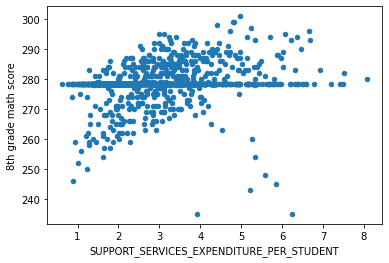

In [30]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT')
plt.ylabel('8th grade math score')

**<CAPTION FOR VIZ 1>**
This graph shows how support services expenditure per student is related to student's 8th grade math score. The data somehow shows a positive correlation but there are some data points at the right bottom don't fit to this relation

Visualization 2

Text(0, 0.5, '8th grade math score')

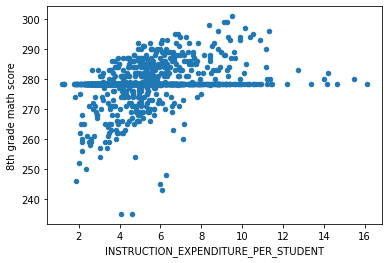

In [31]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('INSTRUCTION_EXPENDITURE_PER_STUDENT')
plt.ylabel('8th grade math score')

**<CAPTION FOR VIZ 2>**
This graph shows how instruction expenditure per student is related to student's 8th grade math score. The data shows a positive correlation and there are less data points which don't fit in this relationship compared to the previous graph

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df[['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 'INSTRUCTION_EXPENDITURE_PER_STUDENT','YEAR', 'LOCAL_REVENUE', 'AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [35]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [36]:
# create your model here
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'MATH 8 SCORE')

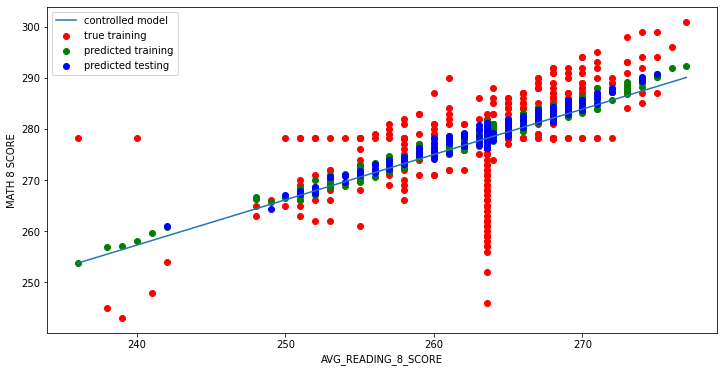

In [44]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_READING_8_SCORE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('MATH 8 SCORE')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**
I hope to learn how to solve NAN datapoints in AVG grade since my method somehow changed the prediction by making the correlation weaker. When I switched to predict 8 th grade, from the graph I found SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT and LOCAL_REVENUE are not useful for my prediction, because the result graph shows they are negatively correlated with AVG_MATH_8_SCORE,and doesn't reflect well on its scatter plot at the beginning. However, AVG_READING_4_SCORE and INSTRUCTION_EXPENDITURE_PER_STUDENT are doing pretty well in the prediction as the controlled model reflect a strong positive correlation with AVG_MATH_4_SCORE and I believe those two factors are reasons for improvements of my model's score. Thus, the student math score can be predicted from those two factors, that if a instruction expenditure per student or avg reading score is higher, the avg math score will also somehow be higher